# SVM

## Introduction

- SVM is a pure classification model. Unlike Logistic regression where output is probabilities, here the output is class, i.e, either +1 or -1. 

- SVM classifiers are used for **prediction with confidence**. (Why I say so will be explained further)

- Also called as **Large Margin Classifier**.

- Primarily designed for **binary classification**, meaning it distinguishes between two classes; think (+) or (-). More advanced SVMs can discriminate between many classes.

- SVM can be used for learning complex **non-linear boundary functions**.

- Linear SVM uses **Hinge loss**, whereas Non-linear SVM uses **dual form with QP**.

## Hypothesis Function

$$\large f_\theta(X) = sign(\theta_0 + \sum_{i=1}^mx^i\theta_i)$$

## Defining  the hyperplane for SVM

### Introduction

**In SVM, given two classes, we seek to produce a hyperplane that maximizes the distance between the two training classes.**

<br>
<center><img src="images/small_margin.gif" width="80%"/></center>

The margin is up to the nearest point of each class.

The general equation of a (hyper)plane in the n-dimensional feature space (in two dimensions a plane is a line):

$$ f_\theta (x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_p $$

$$  f_\theta (x) = \theta_0 + \textbf{$\theta^{T}$}\textbf{x} $$

Our plane is going to divide the two classes in hyperspace. There are an infinite number of ways of choosing the different coefficients to represent the plane, but in this case we are just going to make it as simple as possible by setting $f_\theta (x)$ to 1:

$$ |\theta_0 + \textbf{$\theta^{T}$}\textbf{x}| = 1 $$

In this case $\textbf{x}$ represents those training examples closest to the hyperplane. This is an important element of what we are doing, because ideally we want to find the plane that maximizes distance between the positive and negative training examples. 

### Principal equation of the hyperplane

<center><img src="images/svm_formalism.png" width="900"/></center>

Recall that we were discussing classifying the data into the (+) and (-) group. Thus we consider these classification states as output variables $\textbf{y}$ to our method. Going back to our equation, we can write:

**For the positive class:**

$$b_0 + \textbf{$w^{T}$}\textbf{x} = +1$$ 


**For the negative class:**

$$b_0 + \textbf{$w^{T}$}\textbf{x} = -1$$

Again recalling that the $y$ are either $+1$ or $-1$. 

Also recall that the plane includes all data point solutions above the plane in the positive class. All solutions below the plane are in the negative class, therefore;

$$b_0 + \textbf{$w^{T}$}\textbf{x} \geq 1$$

and also

$$b_0 + \textbf{$w^{T}$}\textbf{x} \leq -1$$

Thinking of the $y_i$ as multipliers by $+1$ or $-1$, we can write:

$$y_i(b_0 + w^{T}x_{i}) \geq 1$$

for all datapoints $i=1,2, \cdots , m$

So, we see that in SVM  instead of one decision boundary $ \theta_T * x=0 $, we have two boundaries, $\theta_T *x=1$ and $\theta_T *x=-1$

#### Maximise Margin

The total **margin** between the support vectors is given by **m**:

$$m = \frac{2}{\|w\|}$$

With an SVM, we seek to **maximize m**. This is why SVMs are called **maximum margin classifiers**.

<center><img src="images/max_margin.png" width="500"/></center>

### To summarise:

**We can define the hyperplane in terms of the training points closest to the plane. These points are called *support vectors***.

The equation of the plane is given as 

$$|\theta_0 + \textbf{$\theta^{T}$}\textbf{x}|=1$$

Where the $\textbf{x}$ are the **support vectors**.

It bears mentioning here that the $\theta$ coefficients are often described in other literature as **"weights"**, with the origin $\theta_0$ callsed **"bias"** $b$, such that the equation of the plane is written:

$$|\textbf{$\theta^{T}$}\textbf{x}+b|=1$$

However, we are going to continue to use the $\theta$ notation in these notes so as to highlight the relationship between the well-known OLS regression and SVMs.

## Cost Function

Recall that our main cost function seeks to find those minimal weights *as a whole* (remember shrinkage) that fit our criteria. Returning to the concept of a **norm**, we are going to minimize $\|\theta\|_2$ subject to our principle equation, $\sum_{i=0}^{n}y_i(\theta_0 + \theta^{T}x_{i}) \geq 1$ derived above.

We use an equation known in the literature as a *Lagrangian* as a way of posing the cost function of our method. A Lagrangian is an equation of the form:

$$\Lambda(x,y,\alpha) = f(x,y)+\alpha\ \cdot g(x,y)$$



hinge loss function
------

<center><img src="images/The-hinge-loss-function.png" width="55%"/></center>

<center><img src="images/hinge-formula.png" width="55%"/></center>

## Soft Margin SVMs

For reasons discussed in more detail below, most real-world cases will require the ability to tolerate some misclassification, where there are datapoints labeled as one class that should be in the other, or where noise or hidden variables lead to unclear relationships amongst the classes. 

In this case, **even the optimal solution** will have some training datapoints that land on the wrong side of the plane. 

We deal with this using **Soft Margins**. All standard SVM applications use soft margins. 

For each point $i$, if the point falls on the wrong side of the hyperplane during training, we assign it a *penalty* $\xi_i$, based on its distance from the plane. 

We minimize $\sum_{i=0}^{n}\xi_i$ along with the hyperplane during optimization. 

In this case, the principal equations become:

$$y_{i}(b_0 + \textbf{$w^{T}$}x_{i}) \geq m(1 - \xi_{i})$$

For the positive class, and

$$y_{i}(\theta_0 + \textbf{$\theta^{T}$}x_{i}) \leq m(\xi_{i} - 1)$$

For the negative class. We also are assured that

$$\xi_{i} \geq 0$$

Because we don't penalize points that are not on the wrong side of the plane. 

***notice that the margin figures importantly into the principal equations here. what does it mean to have a nonzero $\xi_{i}$ value?**

So we want to minimize $\frac{1}{2}\|w\|^2 + C\sum_{i=0}^{n}\xi_i$, subject to the above prinicpal equations. 

<center><img src="images/slack.png" width="75%"/></center>

<center><img src="images/svm-eqn.png" width="75%"/></center>

## Kernels: Linear vs. Nonlinear SVMs

"Kernel" means "heart" or "essence" of something.

In math, which is the origin of the word in this case, a kernel is a member of a set of functions:

$$K: \mathbb{R}^{N} \times \mathbb{R}^{N} \rightarrow \mathbb{R}$$

In the case of the SVM, a kernel maps lower dimensional data into higher dimension and refers to a very particular term in the cost function:

$$\Lambda(x,y,\alpha) = \sum_{i=0}^{n}\alpha_{i}-\frac{1}{2}\sum_{i=0}^{n}\sum_{j=0}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}\underline{x_{i}^{T}x_{j}}$$

This is a dot or inner product, meaning that it produces a single number for each pair of points (vectors) $x_i, x_j$. You will often see it written this way (inner product vector notation):

$$x_{i}^{T}x_{j} = <x_j,x_i>$$

This regular, standard kernel is called a **linear** kernel.

The idea behind using kernels is that hopefully, then the *transformed* data is __linearly separable__ in higher dimensions.

From 2 to 3 dimensions
-----

<center><img src="images/feature_space.png" width="90%"/></center>

φ is the Greek letter "Phi"  
φ is the mapping from one dimension to another

From 2 to 3 dimensions
-----

<center><img src="images/kernel-768x306.png" width="85%"/></center>

In [ ]:
#RBF Kernel
from IPython.display import YouTubeVideo

YouTubeVideo("9NrALgHFwTo")

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("3liCbRZPrZA")

<center><img src="images/feature_2.png" width="50%"/></center>

## The Kernel Trick
<div>
<font color="red">THIS IS A STANDARD INTERVIEW QUESTION</font>
</div>

Transforming the entire Lagrangian from linear into polynomial space is extremely costly in terms of resources. Normally this would imply that we would need to actually increase the number of $\alpha$ coefficients and transform the response variables too.

If we were to actually do this, the computation would become prohibitively expensive rapidly with respect to the number of features. However, because we simply compute a **dot product** for every pair of data points $i,j$ in the original feature space $N$ after we transform the data, *this doesn't happen*. 

We call this **"the kernel trick"**. 

It's a trick because transformation to a nonlinear space doesn't seem to cost us much; we don't need to calculate the transformation explicitly. We can simply calculate the kernel product once, using the additional functions as necessary(a $N \times N$ matrix). This only leads to a linear increase in calculation time - the time it costs to calculate the transformation from one basis to another. We do not increase the dimensionality of the Lagrangian at all. Since this is the most expensive function in terms of computation and storage, it amounts to immense computational leverage.

#### Types of Kernels

It bears mentioning that there are a few different types of kernels commonly in use; we will mention them here.

##### Linear Kernel:

This is simply the standard dot product $<x_j,x_i>$. Sometimes a scalar coefficient $c$ is added.

$$K(x_j,x_i) = <x_j,x_i>+c$$

##### Polynomial Kernels

Some combination of transformations and exponents of the orignal linear kernel. Transformation by the function:

$$f(x, b, c, d) = (bx+c)^{d}$$

Leads to the following expression:

$$K(x_j,x_i) = (b<x_j,x_i>+c)^{d}$$

##### Gaussian and Radial Basis Function Kernels

Radial basis functions model the data as if it came from a distribution, this is done in order to "soften" the locations of the training data. The Gaussian radial kernel is the most common of these:

$$K(x_j,x_i) = e^{-\frac{\|x_j-x_i\|^{2}}{2\sigma^{2}}}$$

There are other variants of the Gaussian, such as the Exponential and Laplace kernels, that leave out the square of the norm. 

The quality of the outcome is rather dependent on the scaling factor $\sigma$ (the broadness of the Gaussian function). 

<center><img src="images/SVM_kernel_1.png" width="75%"/></center>

Kernels & SVMS: Make the data more complex, and keep the model simple.
-------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

from sklearn.datasets import make_blobs

In [2]:
from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()

X = iris.data[:, :2] # Use only the first two features for easier plotting
y = iris.target

In [3]:
X.shape

(150, 2)

In [5]:
np.unique(y)

array([0, 1, 2])

In [14]:
# Define & fit model
# kernel = 'linear'
# kernel = 'rbf'
kernel = 'poly'
clf = SVC(kernel=kernel).fit(X, y)
predicted = clf.predict(iris.data[:, :2])

In [15]:
clf.n_support_

array([ 2, 34, 34], dtype=int32)

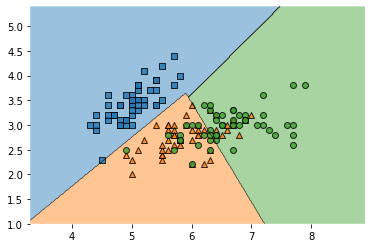

In [8]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

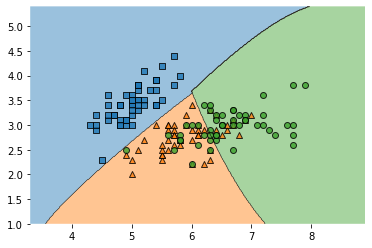

In [13]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

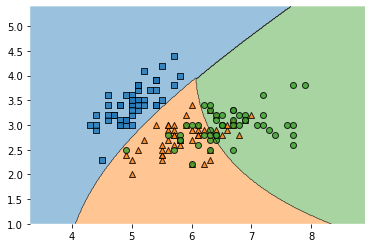

In [16]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

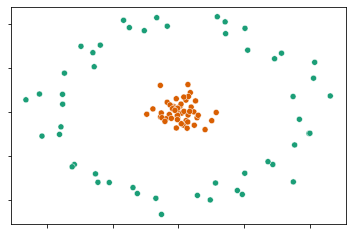

In [17]:
# From blobs to circles
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.1, factor=.01, random_state=42)
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=palette,  legend=False);
ax.set_yticklabels(''); ax.set_xticklabels('');

In [25]:
# Define & fit model
# kernel = 'linear'
kernel = 'rbf'
# kernel = 'poly'
clf = SVC(kernel=kernel).fit(X, y)
predicted = clf.predict(iris.data[:, :2])

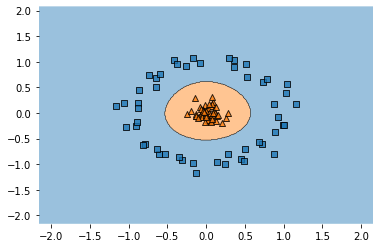

In [26]:
# Plot the decision bounds
from mlxtend.plotting import plot_decision_regions

y_labels = y # actual
# y_labels = predicted
plot_decision_regions(X=X, 
                      y=y_labels, 
                      clf=clf,
                      legend=False);
# NOTE: Linear kernel includes piecewise linear, hence the discontinuity

What are the disadvantages of kernel methods?
------

- Selecting a reasonable kernel can be hard.
- Since kernels are often nonlinear and involve higher dimensional scaling, there can be high computational cost.

## Multiclass SVMs

It is possible to extend the SVM methodology to more than two classes by solving the constraints for each pair of classes separately.

![nonsep](images/plot_iris_001.png)


There are two methods:

##### Any-of

In this case, we build classifiers for each possible class pair and let them all vote. This is an example where it's ok to have something classified as more than one class.

1. Build a classifier for each class, where the training set consists of the set of documents in the class (positive labels) and its complement (negative labels).
1. Given the test set, apply each classifier separately. The decision of one classifier has no influence on the decisions of the other classifiers.

##### One-of

Here we insist that each object must belong to one and only one class.

1. Build a classifier for each class, where the training set consists of points belonging to the class (positive labels) and its complement (negative labels).
1. Given the test document, apply each classifier separately.
1. Assign the document to the class with
    1. the maximum score,
    1. the maximum confidence value,
    1. or the maximum probability of class membership based on the votes of every classifier.

We are not going to go into great detail regarding the construction of Multiclass SVMs at this time, although you will get an opportunity to work with them in the Lab exercise.


### References:

https://www.youtube.com/watch?v=_PwhiWxHK8o